# Getting all packages #

In [2]:
import sys

In [4]:
print(sys.prefix)

C:\ProgramData\anaconda3


In [3]:
!pip install keras --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras_core as keras
import keras_nlp

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Using TensorFlow backend


In [2]:
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
tf.__version__

'2.17.0-dev20240530'

# Loading the data here #

In [5]:
df_train = pd.read_csv("bonus_train_data-1.csv")
df_test = pd.read_csv("bonus_test_data-1.csv")

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (6090, 2)
Training Set Memory Usage = 0.09 MB
Test Set Shape = (1523, 2)
Test Set Memory Usage = 0.02 MB


In [7]:
df_train.head()

,text,target
0,Courageous and honest analysis of need to use ...,1
1,@ZachZaidman @670TheScore wld b a shame if tha...,0
2,Tell @BarackObama to rescind medals of 'honor'...,1
3,Worried about how the CA drought might affect ...,1
4,@YoungHeroesID Lava Blast &amp; Power Red #Pan...,0


# Exploratory Data Analysis #

In [8]:
df_train.describe()

,target
count,6090.000000
mean,0.430542
std,0.495193
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

In [9]:
df_train.describe()

,target,length
count,6090.000000,6090.00000
mean,0.430542,101.06601
std,0.495193,33.78230
min,0.000000,7.00000
25%,0.000000,78.00000
50%,0.000000,107.00000
75%,1.000000,133.00000
max,1.000000,157.00000


array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'length'}>]], dtype=object)

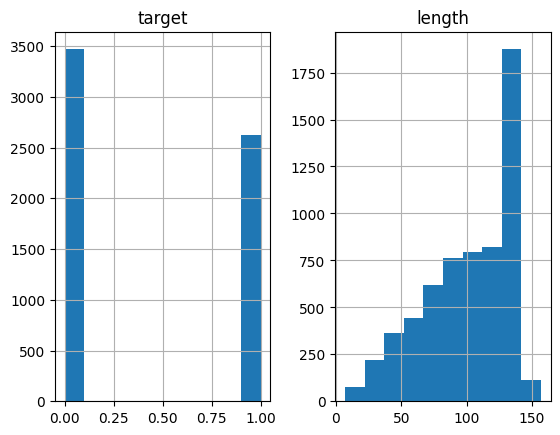

In [11]:
df_train.hist()

# Preprocessing the data #

In [11]:
X = df_train["text"]
y = df_train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = df_test["text"]

In [13]:
X_train, X_val

(2410    @GorpuaZikinak  and tongue out as she collapse...
 1109    Our little forest fire wardens http://t.co/aPr...
 100     Yelp Bolsters Health Care Reviews With Investi...
 4086    How many baskets did  A Charming Fatality by @...
 3639                           To fight bioterrorism sir.
                               ...                        
 3772    Buddha was 'man for his time' - massive urbani...
 5191    Survival Kit Whistle Fire Starter Wire Saw Cre...
 5226    #sing #tsunami Beginners #computer tutorial.: ...
 5390    Demolished My Personal Best  http://t.co/ImULL...
 860     If you were the NWS wth a rotating storm w/ a ...
 Name: text, Length: 4872, dtype: object,
 6049    The Danger and Excitement of Underwater Cave D...
 1612    It's getting to be hazardous getting into this...
 1718    Sammy and todd always to the rescue may not be...
 561     .@DinosaurDracula Felt remorse for missing Pam...
 5359    Sometimes logic gets drowned out in emotion bu...
              

# Load a DistilBERT model from Keras NLP #

Text inputs need to be transformed to numeric token ids and arranged in several Tensors before being input to BERT.

The BertClassifier model can be configured with a preprocessor layer, in which case it will automatically apply preprocessing to raw inputs during fit(), predict(), and evaluate(). This is done by default when creating the model with from_preset().

We will choose DistilBERT model.that learns a distilled (approximate) version of BERT, retaining 97% performance but using only half the number of parameters (paper).

It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of BERT’s performances as measured on the GLUE language understanding benchmark.

Specifically, it doesn't have token-type embeddings, pooler and retains only half of the layers from Google's BERT.

In [15]:
#Load a DistilBERT model.
preset= "distil_bert_base_en_uncased"

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset,
                                                                   sequence_length=160,
                                                                   name="preprocessor_4_tweets"
                                                                  )

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset,
                                                               preprocessor = preprocessor, 
                                                               num_classes=2)

classifier.summary()

AttributeError: module 'keras_nlp' has no attribute 'models'

In [17]:
print("TensorFlow version:", tf.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.17.0-dev20240530


AttributeError: module 'keras_nlp' has no attribute '__version__'